<a href="https://colab.research.google.com/github/KaterinaKintiDS/Machine_Learning/blob/main/Try8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pickle
pd.set_option('display.max_columns', 350)
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from statistics import mean, stdev
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, chi2, RFE
from sklearn.preprocessing import MinMaxScaler

import imblearn
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.compose import ColumnTransformer
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
import functools
from sklearn.model_selection import LeaveOneOut, cross_validate, KFold, GridSearchCV, RandomizedSearchCV,cross_val_score, RepeatedStratifiedKFold, StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, classification_report, roc_auc_score, make_scorer, precision_score, recall_score, roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer, recall_score, log_loss, confusion_matrix, precision_recall_curve, auc,accuracy_score, precision_score,  roc_curve
from sklearn.metrics import average_precision_score,precision_recall_curve, auc,  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from tabulate import tabulate

In [ ]:
#q = pd.read_pickle("FinTech3_2000.pkl")
q = pd.read_pickle("FinTech3_2000.pkl")

In [ ]:
qual = q.sort_values(by='SNAPNUMacc')

In [ ]:
# Separate the features and target variable
X = qual.drop(['Target', 'IDcus', 'IDacc' ], axis=1)
y = qual['Target']

In [ ]:
# calculate percentage of each class of target variable
class_ratio = y.value_counts(normalize=True) * 100
class_ratio

Target
0    99.80796
1     0.19204
Name: proportion, dtype: float64

In [ ]:
#Count classes
"Class distribution:", Counter(y)

('Class distribution:', Counter({0: 413701, 1: 796}))

In [ ]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# One-hot encode categorical features using get_dummies
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


# Concatenate numerical columns from X with the one-hot encoded X
X_combined = pd.concat([X[numerical_columns], X_encoded], axis=1)


In [ ]:
X_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414497 entries, 81573 to 2561996
Columns: 4170 entries, SNAPNUMacc to MEAS_CUSL_HAS_CONTACT_ATTEMPT_Yes
dtypes: bool(3857), float64(210), int32(25), int64(78)
memory usage: 2.4 GB


In [ ]:
# reset index
X_combined.sort_index(inplace=True)
X = X_combined.copy()
X.head()


,SNAPNUMacc,MEAS_ACCH_ORIGINATOR,MEAS_ACCL_STRAY_PAYMENT_AMT,MEAS_ACCL_APLL_FORBORNE,MEAS_ACCL_PROMISE_ACCOUNTS,MEAS_ACCL_PROMISE_ACCOUNT,MEAS_ACCL_KEPT_ACCOUNT,MEAS_ACCL_KEPT_PROMISE,MEAS_ACCL_NUM_OF_PROMISES,MEAS_ACCL_HAS_ARRANGEMENT_FLAG,MEAS_ACCL_BROKEN_SETTLEMENT_INDICATOR_CP,MEAS_ACCL_NBR_OF_PROMISES,MEAS_ACCL_NBR_OF_UNKEPT_PROMISES,MEAS_ACCL_STATUS_PRIORITY,MEAS_ACCL_BUCKET_MAX_NBG,MEAS_ACCL_BILLING_DAY,MEAS_ACCT_BRANCH,MEAS_ACCH_ACTIVE,MEAS_ACCH_DELDAYS,MEAS_ACCH_QC_ISCASE,MEAS_ACCH_QC_ISCONTRACT,MEAS_ACCH_COUNT_RESCHEDULINGS,MEAS_ACCH_FLAG_LITIGATION,MEAS_ACCL_SECONDARY_FLOW_FLAG,MEAS_ACCH_FLAG_COSIGNER,MEAS_ACCH_FLAG_GUARANTOR,MEAS_ACCL_NUMBER_OF_COLLATERALS,MEAS_ACCL_PAYMENT_IN_ALLOCATION,MEAS_ACCH_FLAG_SECURED,MEAS_ACCT_CUST_CODE,MEAS_ACCL_INDICATION_CONTACT_ANY_CP,MEAS_ACCL_INDICATION_CONTACT_ATTEMPT_CP,MEAS_ACCL_INDICATION_CONTACT_RIGHTPERSON_CP,MEAS_ACCL_ALLOCATION_CODE,MEAS_PROD_CODE,MEAS_ACCH_SNAPNUM,MEAS_SPRD_CODE,MEAS_ACCL_CONTACT_NUM_ATTEMPTS_CP,MEAS_ACCL_CONTACT_NUM_RPC_CP,MEAS_ACCL_EBA_FORBORNE,MEAS_ACCL_NUMBER_OF_GUARANTORS,MEAS_ACCL_ACTUAL_CONTACTS,MEAS_ACCL_ACTUAL_CONTACTS_PM,MEAS_ACCL_PAYMENT_RECONCILIATION_CODE,MEAS_ACCL_FLAG_OPEN_RECENTLY,MEAS_ACCL_PHONE_RPC_COUNT_EVER,MEAS_ACCL_EED_PERCENT,MEAS_ACCL_PAYMENTS_REPAYMENT_PLAN_CP,MEAS_ACCL_PAYMENTS_ONEOFF_YTD,MEAS_ACCL_PAYMENTS_REPAYMENT_PLAN_YTD,MEAS_ACCL_PAYMENTS_NO_SETTLEMENT_YTD,MEAS_ACCL_AMT_PROMISE,MEAS_ACCL_AMT_KEPT,MEAS_ACCL_ARRANGEMENT_PRINCIPAL,MEAS_ACCL_ARRANGEMENT_BALANCE,MEAS_ACCL_AMT_INSTAL_NOT_MATURED_CM,MEAS_ACCL_APPL_AMT_APPROVED,MEAS_ACCL_APPL_AMT_DUNNING,MEAS_ACCL_APPL_AMT_APPROVED_NEW,MEAS_ACCL_APPL_AMT_FALLOFF,MEAS_ACCL_LMEM_PAYMENTS_CP,MEAS_ACCL_LMEM_PAYMENTS_CUMUL,MEAS_ACCL_AMT_PAYMENTS_TOTAL,MEAS_ACCL_AMT_OVERPAYMENT_ADDITIONAL,MEAS_ACCL_AMT_PAYMENT_YTD,MEAS_ACCH_AMT_PASTDUE,MEAS_ACCL_AMT_DENOUNCED,MEAS_ACCL_AMT_DUE_NBG,MEAS_ACCL_AMT_PAYMENT_REMAINING,MEAS_ACCH_AMT_BAL_ACCOUNTING,MEAS_ACCL_AMT_ORIG_EXPENSES,MEAS_ACCL_AMT_ORIG_INTEREST_OFFBALANCE,MEAS_ACCL_AMT_ORIG_INTEREST_ONBALANCE,MEAS_ACCL_AMT_ORIG_PRINCIPAL,MEAS_ACCL_AMT_ORIG_CLAIM_PNI,MEAS_ACCL_AMT_OVERPAYMENT,MEAS_ACCH_AMT_EXPENSES,MEAS_ACCL_AMT_INTEREST_OFFBALANCE,MEAS_ACCL_AMT_INTEREST_ONBALANCE,MEAS_ACCH_AMT_PRINCIPAL,MEAS_ACCL_AMT_CLAIM_PNI,MEAS_ACCL_AMT_CLAIM_G3,MEAS_ACCL_DUE_PRINCIPAL,MEAS_ACCL_AMT_CLAIM_G4,MEAS_ACCL_AMT_PRINCIPAL_TOTAL,MEAS_ACCL_AMT_GBV,MEAS_ACCH_AMT_LIMIT,MEAS_ACCL_DEFAULT_BALANCE,MEAS_ACCH_AMT_ARREARS,MEAS_ACCL_LATE_INTEREST,MEAS_ACCL_INTEREST,MEAS_ACCH_AMT_MINPAYMENT,MEAS_ACCH_AMT_BALANCE,MEAS_ACCL_PURCHASE_BALANCE,MEAS_ACCH_AMT_WRITEOFF,MEAS_ACCH_AMT_PAYMENT_LAST,MEAS_ACCL_COLLATERALS_VALUE,MEAS_ACCL_COLLA_MARKET_VALUE,MEAS_ACCL_AMT_BAL_ACCOUNTING_RR,MEAS_ACCL_COLLATERAL_OR_RE_MARKET_VALUE,MEAS_ACCL_EED_GUARANTEED_AMOUNT,SNAPNUMcus,MEAS_CUSL_PHONE_RPC_COUNT,MEAS_CUSL_COUNT_RPC,MEAS_CUSL_COUNT_NO_CONTACT,MEAS_CUSL_COUNT_3RD_PARTY,MEAS_CUSL_DIALLER_ATTEMPTS_COUNT,MEAS_CUSL_HAS_ACTIVE_ARRANGEMENT,MEAS_CUSL_HAS_PAYMENT,MEAS_CUSH_COUNT_PHONES,MEAS_CUSL_COLLECTION_CASES_NUM,MEAS_CUSL_HAS_RESTRUCTURING_APPLICATION,MEAS_CUSH_OWNER_HOME,MEAS_CUSL_IS_CO_OWNER,MEAS_CUSL_IS_GUARANTOR,MEAS_CUSL_IS_PRIMARY_OWNER,MEAS_CUSL_COLLECTION_CASES_NUM_PRIMARY_OWNER,MEAS_CUSL_TOTAL_ACCOUNTS,MEAS_CUSL_LAST_PAYMENT_AMOUNT,MEAS_CUSL_DEBT_AMOUNT_PRIMARY_OWNER,MEAS_CUSL_TOTAL_OUTSTANDING_AMOUNT,MEAS_CUSL_DEBT_AMOUNT,MEAS_CUSL_ACCOUNTING_BALANCE,MEAS_CUSL_BALANCE,MEAS_CUSL_BALANCE_PRIMARY_OWNER,months_since_2000_MEAS_ACCL_LAST_KEPT_BROKEN_DATE,months_since_2000_MEAS_ACCL_PREVIOUS_RETURN_DATE,months_since_2000_MEAS_ACCH_DATE_EXP,months_since_2000_MEAS_ACCL_LAST_BILLING_DATE_CLIENT,months_since_2000_MEAS_ACCH_DATE_BILLING_NEXT,months_since_2000_MEAS_ACCH_DATE_LITIGATION,months_since_2000_MEAS_ACCH_DATE_PAYMENT_LAST,months_since_2000_MEAS_ACCH_DELINQ_PACKAGE_DATE,months_since_2000_MEAS_ACCL_PACKET_DEFINITION_DATE,months_since_2000_MEAS_ACCL_LAST_RECALL_DATE,months_since_2000_MEAS_ACCH_DELINQ_STRATEGY_ENTRYDATE,months_since_2000_MEAS_ACCH_DELINQ_STEP_ENTRYDATE,months_since_2000_

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414497 entries, 0 to 2763299
Columns: 4170 entries, SNAPNUMacc to MEAS_CUSL_HAS_CONTACT_ATTEMPT_Yes
dtypes: bool(3857), float64(210), int32(25), int64(78)
memory usage: 2.4 GB


In [ ]:
# Split the data into training and test sets
#With Stratified splitting, when you generate a training / test dataset split, it will attempt to keep the same percentages of classes in each split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Use MinMaxScaler instead of RobustScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# SelectKBest, instead of SelectFromModel
k_best = 350
select_k_best = SelectKBest(chi2, k=k_best)
X_train_k_best = select_k_best.fit_transform(X_train_scaled, y_train)
X_test_k_best = select_k_best.transform(X_test_scaled)

In [ ]:
#RFE with RandomForestClassifier / XGBoost didn't gave good results / RFECV didn't run

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=150)
X_train_rfe = rfe.fit_transform(X_train_k_best, y_train)
X_test_rfe = rfe.transform(X_test_k_best)

In [ ]:
# Get the indices of the selected features after RFE
selected_feature_indices_rfe = np.where(rfe.support_)[0]
print("Selected Feature Indices after RFE:", selected_feature_indices_rfe)

Selected Feature Indices after RFE: [  0   1   4   5  10  13  14  16  18  19  20  21  22  23  24  29  30  31
  33  35  36  37  38  42  43  46  47  49  53  60  64  74  75  77  78  84
  85  86  87  90  91  93  94  97  99 108 109 113 118 119 120 123 125 126
 130 131 132 134 136 140 141 143 144 145 146 148 150 153 156 157 158 159
 162 164 169 170 171 172 174 175 178 179 182 183 185 186 187 192 193 194
 195 197 198 199 200 202 203 204 205 206 207 208 209 210 211 212 214 215
 216 217 218 220 222 224 233 234 235 243 244 257 259 261 267 268 270 280
 292 293 297 299 301 302 305 307 317 322 324 325 327 332 333 334 336 337
 339 341 343 346 348 349]


In [ ]:
# Get the column names based on the selected indices
selected_column_names_rfe = X.columns[selected_feature_indices_rfe]
print("Selected Column Names after RFE:", selected_column_names_rfe)

Selected Column Names after RFE: Index(['SNAPNUMacc', 'MEAS_ACCH_ORIGINATOR', 'MEAS_ACCL_PROMISE_ACCOUNTS',
       'MEAS_ACCL_PROMISE_ACCOUNT', 'MEAS_ACCL_BROKEN_SETTLEMENT_INDICATOR_CP',
       'MEAS_ACCL_STATUS_PRIORITY', 'MEAS_ACCL_BUCKET_MAX_NBG',
       'MEAS_ACCT_BRANCH', 'MEAS_ACCH_DELDAYS', 'MEAS_ACCH_QC_ISCASE',
       ...
       'MEAS_ACCL_APPL_TYPE_Λογαριασμός εξόδων',
       'MEAS_ACCL_APPL_TYPE_Χρονικές Συμβιβαστικές Ρυθμίσεις',
       'MEAS_ACCL_APPLICATION_SUCCESSFUL_Yes',
       'MEAS_ACCL_UNDERWRITING_SEGMENT_S1 SS1',
       'MEAS_ACCL_UNDERWRITING_SEGMENT_S1 SS3',
       'MEAS_ACCL_UNDERWRITING_SEGMENT_S1 SS5',
       'MEAS_ACCL_UNDERWRITING_SEGMENT_S1 SS7',
       'MEAS_ACCL_UNDERWRITING_SEGMENT_S2 AC SS3',
       'MEAS_ACCL_UNDERWRITING_SEGMENT_S2 AC SS5',
       'MEAS_ACCL_UNDERWRITING_SEGMENT_S2 AC SS6'],
      dtype='object', length=150)


In [ ]:
# Get the column names based on the selected indices
selected_column_names_rfe = X.columns[selected_feature_indices_rfe]
selected_column_names_list = selected_column_names_rfe.tolist()

# Print the list of selected column names
print("Selected Column Names after RFE:", selected_column_names_list)


Selected Column Names after RFE: ['SNAPNUMacc', 'MEAS_ACCH_ORIGINATOR', 'MEAS_ACCL_PROMISE_ACCOUNTS', 'MEAS_ACCL_PROMISE_ACCOUNT', 'MEAS_ACCL_BROKEN_SETTLEMENT_INDICATOR_CP', 'MEAS_ACCL_STATUS_PRIORITY', 'MEAS_ACCL_BUCKET_MAX_NBG', 'MEAS_ACCT_BRANCH', 'MEAS_ACCH_DELDAYS', 'MEAS_ACCH_QC_ISCASE', 'MEAS_ACCH_QC_ISCONTRACT', 'MEAS_ACCH_COUNT_RESCHEDULINGS', 'MEAS_ACCH_FLAG_LITIGATION', 'MEAS_ACCL_SECONDARY_FLOW_FLAG', 'MEAS_ACCH_FLAG_COSIGNER', 'MEAS_ACCT_CUST_CODE', 'MEAS_ACCL_INDICATION_CONTACT_ANY_CP', 'MEAS_ACCL_INDICATION_CONTACT_ATTEMPT_CP', 'MEAS_ACCL_ALLOCATION_CODE', 'MEAS_ACCH_SNAPNUM', 'MEAS_SPRD_CODE', 'MEAS_ACCL_CONTACT_NUM_ATTEMPTS_CP', 'MEAS_ACCL_CONTACT_NUM_RPC_CP', 'MEAS_ACCL_ACTUAL_CONTACTS_PM', 'MEAS_ACCL_PAYMENT_RECONCILIATION_CODE', 'MEAS_ACCL_EED_PERCENT', 'MEAS_ACCL_PAYMENTS_REPAYMENT_PLAN_CP', 'MEAS_ACCL_PAYMENTS_REPAYMENT_PLAN_YTD', 'MEAS_ACCL_ARRANGEMENT_PRINCIPAL', 'MEAS_ACCL_LMEM_PAYMENTS_CP', 'MEAS_ACCL_AMT_PAYMENT_YTD', 'MEAS_ACCL_AMT_ORIG_CLAIM_PNI', 'MEAS_AC

In [ ]:
#Highly imbalanced dataset, both oversample and undersample
resampling_strategy = {
    'minority': 0.4,
    'majority': 0.5
}

# Create a pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=resampling_strategy['minority'], n_jobs=-1)),
    ('undersample', RandomUnderSampler(sampling_strategy=resampling_strategy['majority']))
])

# Fit and transform the training data
X_train_resampled, y_train_resampled = pipeline.named_steps['oversample'].fit_resample(X_train_rfe, y_train)
X_train_resampled, y_train_resampled = pipeline.named_steps['undersample'].fit_resample(X_train_resampled, y_train_resampled)


  File "C:\Users\Katerina\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Katerina\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [ ]:
# Check the class distribution before and after SMOTE
class_distribution_before = pd.Series(y_train).value_counts(normalize=True)
class_distribution_after = pd.Series(y_train_resampled).value_counts(normalize=True)

print("Class Distribution Before SMOTE:")
print(class_distribution_before)

print("\nClass Distribution After SMOTE:")
print(class_distribution_after)

Class Distribution Before SMOTE:
Target
0    0.998079
1    0.001921
Name: proportion, dtype: float64

Class Distribution After SMOTE:
Target
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [ ]:
from prettytable import PrettyTable
# Create a table
table = PrettyTable()
#model_labels = ["Random Forest", "XGBoost", "Focal Loss", "Weighted Loss", "Grid Search_Base Model", "Grid Search_Focal Loss", "Grid Search_Weighted Loss"]
table.field_names = ["Model", "ROC-AUC", "Precision-Recall AUC"]

Random Forest

In [ ]:
# fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the test set
y_pred_proba = rf.predict_proba(X_test_rfe)[:, 1]

# Evaluate ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc_rf:.4f}')

ROC-AUC: 0.5386


In [ ]:
#Precision-Recall AUC
pr_auc_rf = average_precision_score(y_test, y_pred_proba)
print(f'Precision-Recall AUC: {pr_auc_rf:.4f}')
table.add_row(["Random Forest", f"{roc_auc_rf:.4f}", f"{pr_auc_rf:.4f}"])


Precision-Recall AUC: 0.0022


In [ ]:
# Classification Report
y_pred = rf.predict(X_test_rfe)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82741
           1       0.00      0.00      0.00       159

    accuracy                           1.00     82900
   macro avg       0.50      0.50      0.50     82900
weighted avg       1.00      1.00      1.00     82900



XGBoost

In [ ]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the test set
y_pred_proba = xgb.predict_proba(X_test_rfe)[:, 1]

# Evaluate ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc_xgb:.4f}')

ROC-AUC: 0.6371


In [ ]:
#Precision-Recall AUC
pr_auc_xgb = average_precision_score(y_test, y_pred_proba)
print(f'Precision-Recall AUC: {pr_auc_xgb:.4f}')
table.add_row(["XGBoost", f"{roc_auc_xgb:.4f}", f"{pr_auc_xgb:.4f}"])

Precision-Recall AUC: 0.0033


In [ ]:
# Classification Report
y_pred = xgb.predict(X_test_rfe)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82741
           1       0.00      0.00      0.00       159

    accuracy                           1.00     82900
   macro avg       0.50      0.50      0.50     82900
weighted avg       1.00      1.00      1.00     82900



Focal loss

In [ ]:
y_train_resampled = y_train_resampled.to_numpy().flatten()

In [ ]:
def score_eval_func(y_test, y_pred_prob):
    roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
    pr_auc = average_precision_score(y_test, y_pred_prob[:, 1])
    return roc_auc, pr_auc


In [ ]:
# Instantiate imbalance-xgboost instance with focal loss
xgbooster_focal = imb_xgb(special_objective='focal')

# GridSearchCV for focal loss hyperparameter tuning
cvFocalBooster = GridSearchCV(xgbooster_focal, {'focal_gamma': [1.0, 1.5, 2.0, 2.5, 3.0]}, error_score='raise')

# Fit booster
cvFocalBooster.fit(X_train_resampled, y_train_resampled)
opt_focal_booster = cvFocalBooster.best_estimator_
opt_focal_parameter = cvFocalBooster.best_params_

# Fit the model on the entire dataset
opt_focal_booster.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the test set
# Evaluate ROC-AUC and Precision-Recall AUC
y_pred_prob_focal = opt_focal_booster.predict_two_class(X_test_rfe, y=None)
roc_auc_focal, pr_auc_focal = score_eval_func(y_test, y_pred_prob_focal)
print(f'ROC-AUC (Focal Loss): {roc_auc_focal:.4f}, Precision-Recall AUC: {pr_auc_focal:.4f}')
table.add_row(["Focal Loss", f"{roc_auc_focal:.4f}", f"{pr_auc_focal:.4f}"])

ROC-AUC (Focal Loss): 0.6464, Precision-Recall AUC: 0.0030


Weighted loss

In [ ]:
# Instantiate imbalance-xgboost instance with weighted loss
xgbooster_weight = imb_xgb(special_objective='weighted')

# GridSearchCV for weighted loss hyperparameter tuning
CV_weight_booster = GridSearchCV(xgbooster_weight, {"imbalance_alpha": [1.5, 2.0, 2.5, 3.0]}, error_score='raise')

# Fit booster
CV_weight_booster.fit(X_train_resampled, y_train_resampled)
opt_weight_booster = CV_weight_booster.best_estimator_
opt_weight_parameter = CV_weight_booster.best_params_

# Fit the model on the entire dataset
opt_weight_booster.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the test set
# Evaluate ROC-AUC and Precision-Recall AUC
y_pred_prob_weight = opt_weight_booster.predict_two_class(X_test_rfe, y=None)
roc_auc_weight, pr_auc_weight = score_eval_func(y_test, y_pred_prob_weight)
print(f'ROC-AUC (Weighted Loss): {roc_auc_weight:.4f}, Precision-Recall AUC: {pr_auc_weight:.4f}')
table.add_row(["Weightd Loss", f"{roc_auc_weight:.4f}", f"{pr_auc_weight:.4f}"])

ROC-AUC (Weighted Loss): 0.6286, Precision-Recall AUC: 0.0030


Grid Search

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score
from prettytable import PrettyTable

# Define the parameter grid for GridSearchCV
param_grid = {
    'booster': ['gbtree'],
    'eta': [0.01, 0.1],
    'max_depth': [7, 8, 9],
    'num_round': [100],
    'verbosity': [0],
    'early_stopping_rounds': [None, 5],
}

In [ ]:
from sklearn.metrics import make_scorer, precision_recall_curve, auc

# Define the custom scorer function
def pr_auc_scorer(y_true, y_probas):
    precision, recall, _ = precision_recall_curve(y_true, y_probas)
    return auc(recall, precision)

# Create the custom scorer
custom_scorer = make_scorer(pr_auc_scorer, needs_proba=True)

In [ ]:
# For focal loss, add the focal_gamma parameter
focal_param_grid = param_grid.copy()
focal_param_grid['focal_gamma'] = [1.0, 1.5, 2.0, 2.5, 3.0]

In [ ]:
# XGBoost GridSearchCV
xgb = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring=custom_scorer, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Best model for XGBoost
best_xgb = grid_search_xgb.best_estimator_

# Predict probabilities on the test set
y_pred_proba_xgb = best_xgb.predict_proba(X_test_rfe)[:, 1]

# Evaluate ROC-AUC and Precision-Recall AUC for XGBoost
roc_auc_xgb_gs = roc_auc_score(y_test, y_pred_proba_xgb)
pr_auc_xgb_gs = average_precision_score(y_test, y_pred_proba_xgb)
print(f'ROC-AUC (XGBoost): {roc_auc_xgb:.4f}')
print(f'Precision-Recall AUC (XGBoost): {pr_auc_xgb:.4f}')
table.add_row(["XGBoost Grid Search", f"{roc_auc_xgb_gs:.4f}", f"{pr_auc_xgb_gs:.4f}"])

ROC-AUC (XGBoost): 0.6371
Precision-Recall AUC (XGBoost): 0.0033


In [ ]:
# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_xgb.best_params_)


Best parameters found by GridSearchCV:
{'booster': 'gbtree', 'early_stopping_rounds': None, 'eta': 0.1, 'max_depth': 9, 'num_round': 100, 'verbosity': 0}


In [ ]:
# Imbalance-XGBoost with focal loss GridSearchCV
xgbooster_focal = imb_xgb(special_objective='focal')
grid_search_focal = GridSearchCV(xgbooster_focal, focal_param_grid, scoring=custom_scorer, cv=5, n_jobs=-1)
grid_search_focal.fit(X_train_resampled, y_train_resampled)

# Best model for focal loss
best_focal = grid_search_focal.best_estimator_

# Predict probabilities on the test set for focal loss model
y_pred_prob_focal = best_focal.predict_two_class(X_test_rfe, y=None)

# Evaluate ROC-AUC and Precision-Recall AUC for focal loss model
roc_auc_focal_gs, pr_auc_focal_gs = score_eval_func(y_test, y_pred_prob_focal)
print(f'ROC-AUC (Focal Loss): {roc_auc_focal_gs:.4f}')
print(f'Precision-Recall AUC (Focal Loss): {pr_auc_focal_gs:.4f}')
table.add_row(["Focal Loss GS", f"{roc_auc_focal_gs:.4f}", f"{pr_auc_focal_gs:.4f}"])



ROC-AUC (Focal Loss): 0.6607
Precision-Recall AUC (Focal Loss): 0.0036


In [ ]:
# For focal loss, add the focal_gamma parameter
weighted_param_grid = param_grid.copy()
weighted_param_grid["imbalance_alpha"]= [1.0, 1.5, 2.0, 2.5, 3.0]

In [ ]:
# Imbalance-XGBoost with weighted loss GridSearchCV
xgbooster_weighted = imb_xgb(special_objective='weighted')
grid_search_weighted = GridSearchCV(xgbooster_weighted, weighted_param_grid, scoring=custom_scorer, cv=5, n_jobs=-1)
grid_search_weighted.fit(X_train_resampled, y_train_resampled)

# Best model for weighted loss
best_weighted = grid_search_weighted.best_estimator_

# Predict probabilities on the test set for weighted loss model
y_pred_prob_weighted = best_weighted.predict_two_class(X_test_rfe, y=None)

# Evaluate ROC-AUC and Precision-Recall AUC for weighted loss model
roc_auc_weighted, pr_auc_weighted = score_eval_func(y_test, y_pred_prob_weighted)
print(f'ROC-AUC (weighted Loss): {roc_auc_weighted:.4f}')
print(f'Precision-Recall AUC (weighted Loss): {pr_auc_weighted:.4f}')
table.add_row(["Weighted Loss GS", f"{roc_auc_weighted:.4f}", f"{pr_auc_weighted:.4f}"])

ROC-AUC (weighted Loss): 0.6624
Precision-Recall AUC (weighted Loss): 0.0035


In [ ]:
print(table)

+---------------------+---------+----------------------+
|        Model        | ROC-AUC | Precision-Recall AUC |
+---------------------+---------+----------------------+
|    Random Forest    |  0.5386 |        0.0022        |
|       XGBoost       |  0.6371 |        0.0033        |
|      Focal Loss     |  0.6464 |        0.0030        |
|     Weightd Loss    |  0.6286 |        0.0030        |
| XGBoost Grid Search |  0.6311 |        0.0030        |
|    Focal Loss GS    |  0.6607 |        0.0036        |
|   Weighted Loss GS  |  0.6624 |        0.0035        |
+---------------------+---------+----------------------+


Winning : XGBoost with Grid Search Base Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import numpy as np

# Extract the probabilities for the positive class (assuming the positive class is the second column)
y_pred_prob_positive = y_pred_prob_weighted[:, 1]

# Step 1: Classification Report with 0.5 Threshold
y_pred_class_0_5 = (y_pred_prob_positive >= 0.5).astype(int)
classification_report_0_5 = classification_report(y_test, y_pred_class_0_5)
print("Classification Report (Threshold = 0.5):")
print(classification_report_0_5)

# Step 2: Find the Optimal Threshold based on F1 score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_positive)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Step 3: Predict class labels using the Optimal Threshold
y_pred_class_optimal = (y_pred_prob_positive >= optimal_threshold).astype(int)

# Step 4: Generate Confusion Matrix
conf_matrix_optimal = confusion_matrix(y_test, y_pred_class_optimal)
print("Confusion Matrix (Optimal Threshold):")
print(conf_matrix_optimal)

# Step 5: Calculate ROC-AUC Score for the Optimal Threshold
roc_auc_optimal_threshold = roc_auc_score(y_test, y_pred_class_optimal)
print(f'ROC-AUC (Optimal Threshold): {roc_auc_optimal_threshold:.4f}')

# Step 6: Calculate Precision-Recall AUC for the Optimal Threshold
precision_optimal, recall_optimal, _ = precision_recall_curve(y_test, y_pred_class_optimal)
pr_auc_optimal = auc(recall_optimal, precision_optimal)
print(f'Precision-Recall AUC (Optimal Threshold): {pr_auc_optimal:.4f}')

# Step 7: Print Classification Report for the Optimal Threshold
classification_report_optimal = classification_report(y_test, y_pred_class_optimal)
print("Classification Report (Optimal Threshold):")
print(classification_report_optimal)


Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     82741
           1       0.00      0.11      0.01       159

    accuracy                           0.94     82900
   macro avg       0.50      0.53      0.49     82900
weighted avg       1.00      0.94      0.97     82900

Optimal Threshold: 0.5292
Confusion Matrix (Optimal Threshold):
[[82725    16]
 [  159     0]]
ROC-AUC (Optimal Threshold): 0.4999
Precision-Recall AUC (Optimal Threshold): 0.0010
Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82741
           1       0.00      0.00      0.00       159

    accuracy                           1.00     82900
   macro avg       0.50      0.50      0.50     82900
weighted avg       1.00      1.00      1.00     82900



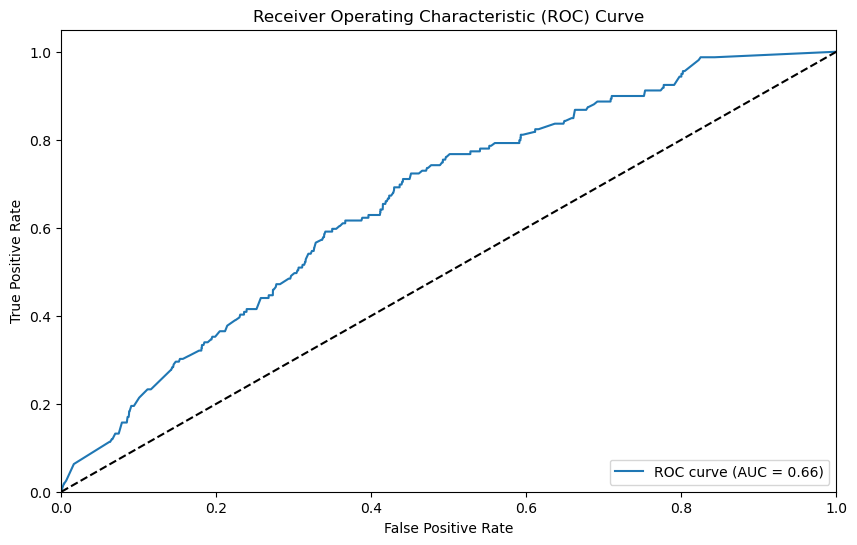

In [ ]:
#Plot ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_positive)
roc_auc = roc_auc_score(y_test, y_pred_prob_positive)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

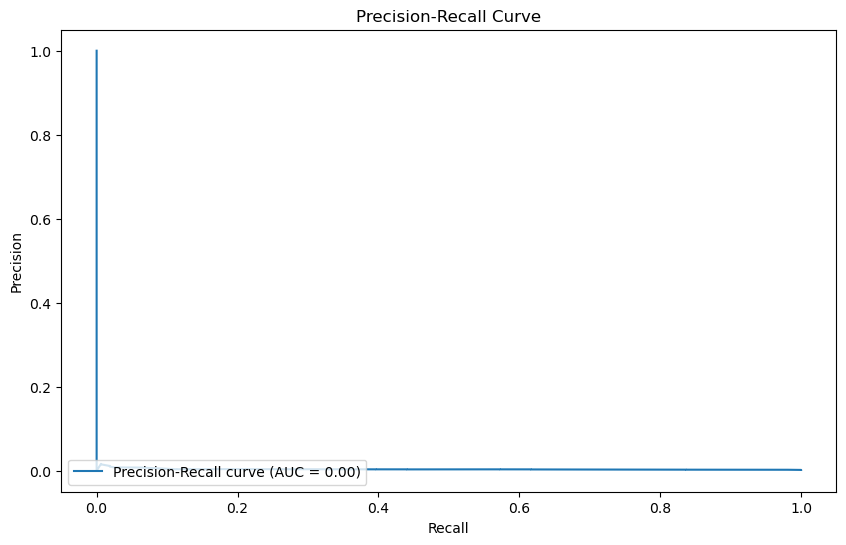

In [ ]:
# Plot Precision-Recall Curve with AUC

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_positive)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


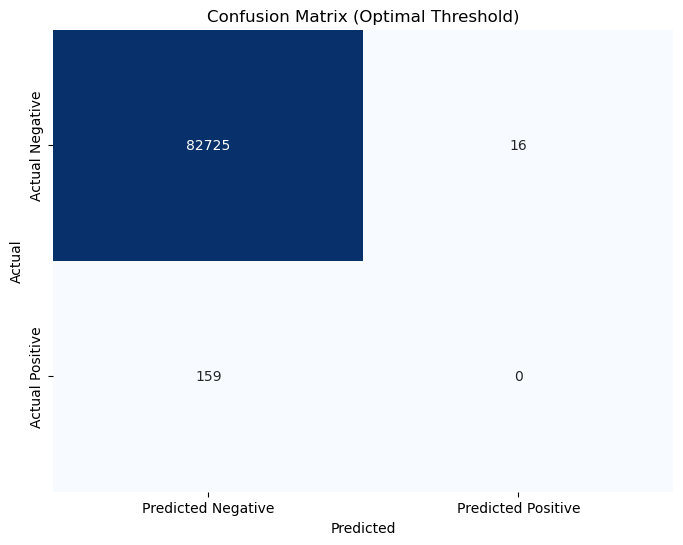

In [ ]:
 #Plot Confusion Matrix with Optimal Threshold
conf_matrix_optimal = confusion_matrix(y_test, y_pred_class_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimal Threshold)')
plt.show()

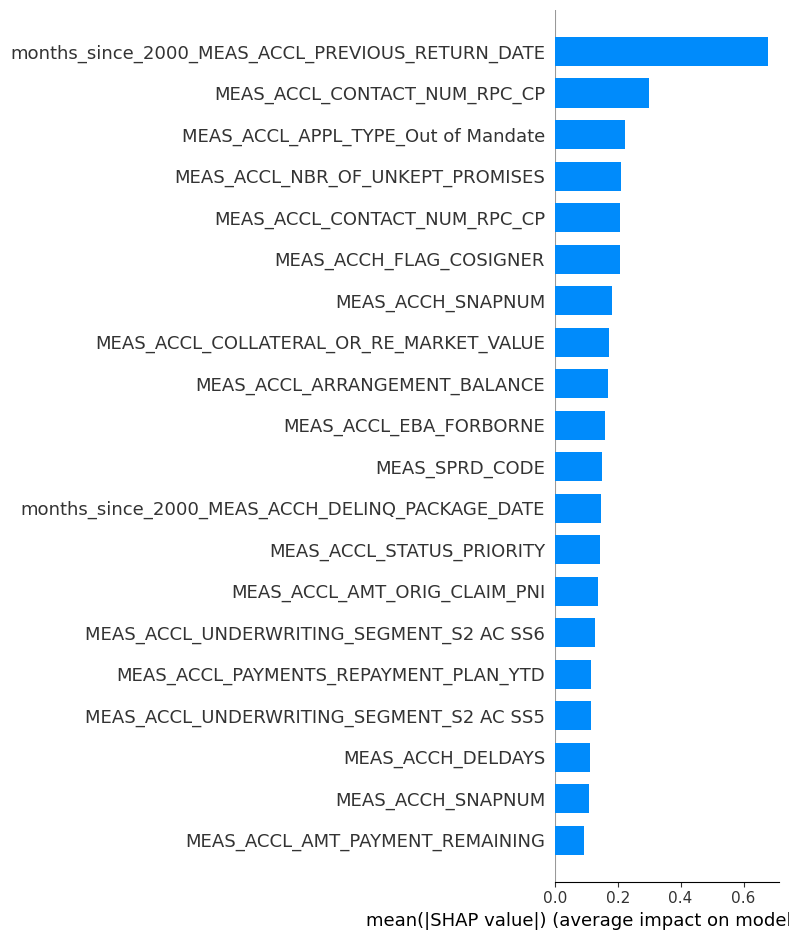

In [ ]:
import shap

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Create a SHAP explainer using the optimized XGBoost model with weighted loss
explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values for the test set
shap_values_base = explainer.shap_values(X_test_rfe)

# Plot summary plot for the SHAP values
shap.summary_plot(shap_values_base, X_test_rfe, plot_type="bar", feature_names=selected_column_names_rfe)


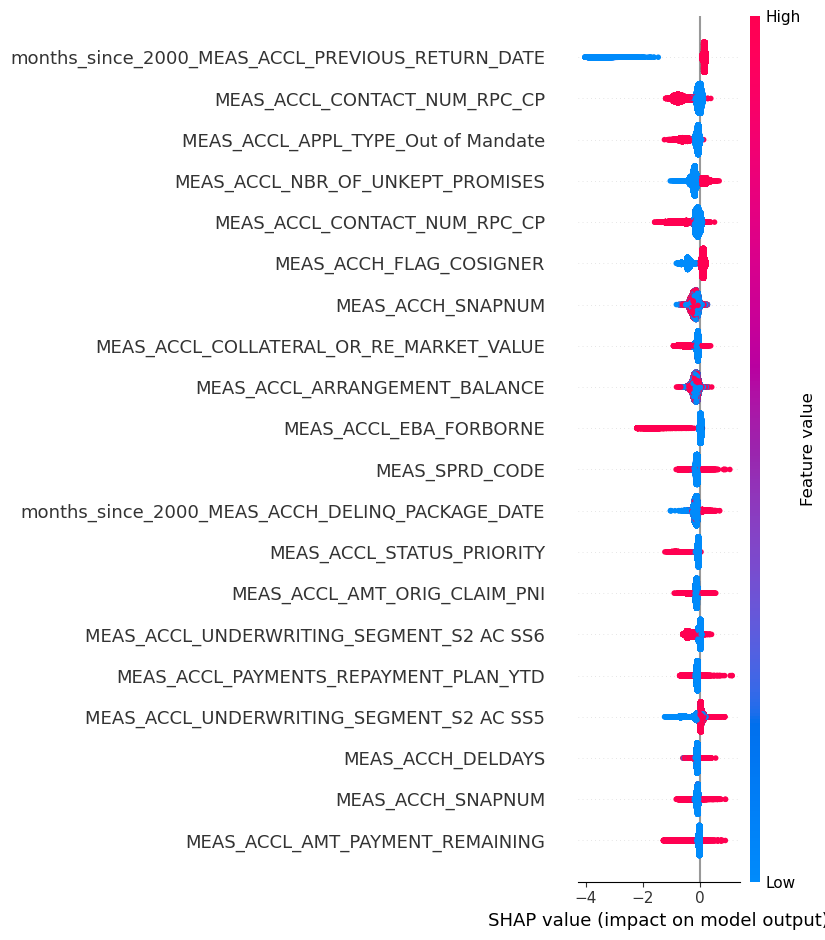

In [ ]:
# Plot summary plot for all instances in the test set
shap.summary_plot(shap_values_base, X_test_rfe,feature_names=selected_column_names_rfe)